## **EE524 Machine Leanig Laboratory - ML Project**
* **Name - Durgesh Yadav**
* **Roll no. - 234102305**


In [1]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=70bb210f968f0507e42bfc511cebd47a56f85c273f74ffcf201e8104f0ad22c8
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns

from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [3]:
dir = "../input/handwritten-characters/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [4]:
len(train_data)

140000

In [5]:
val_dir = "../input/handwritten-characters/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [6]:
len(val_data)

15209

In [7]:
random.shuffle(train_data)
random.shuffle(val_data)

In [8]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [9]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [10]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [11]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [12]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [13]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [14]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "valid", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 128)        

In [22]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [23]:
history = model.fit(train_X,train_Y, epochs=30, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/30
4375/4375 [==============================] - 14s 3ms/step - loss: 0.6330 - accuracy: 0.7996 - val_loss: 0.3397 - val_accuracy: 0.8908
Epoch 2/30
4375/4375 [==============================] - 14s 3ms/step - loss: 0.3497 - accuracy: 0.8827 - val_loss: 0.2674 - val_accuracy: 0.9110
Epoch 3/30
4375/4375 [==============================] - 13s 3ms/step - loss: 0.3048 - accuracy: 0.8961 - val_loss: 0.2993 - val_accuracy: 0.8951
Epoch 4/30
4375/4375 [==============================] - 14s 3ms/step - loss: 0.2778 - accuracy: 0.9040 - val_loss: 0.2709 - val_accuracy: 0.9006
Epoch 5/30
4375/4375 [==============================] - 13s 3ms/step - loss: 0.2629 - accuracy: 0.9093 - val_loss: 0.2561 - val_accuracy: 0.9071
Epoch 6/30
4375/4375 [==============================] - 14s 3ms/step - loss: 0.2482 - accuracy: 0.9121 - val_loss: 0.2250 - val_accuracy: 0.9211
Epoch 7/30
4375/4375 [==============================] - 13s 3ms/step - loss: 0.2380 - accuracy: 0.9159 - val_loss: 0.2296 - val_ac

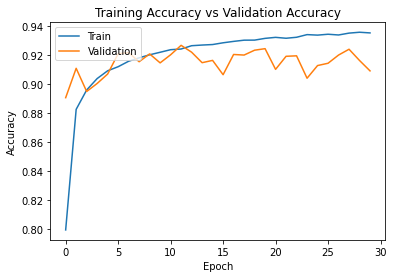

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

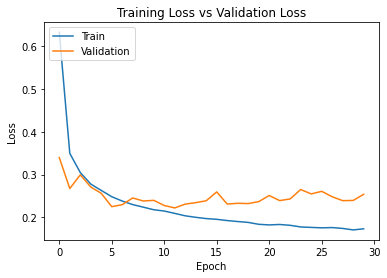

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss",mode="min", patience=5,restore_best_weights=True)

history = model.fit(train_X,train_Y, epochs=15, batch_size=32, validation_data = (val_X, val_Y),  callbacks=[earlystopping])

Epoch 1/15
4375/4375 [==============================] - 14s 3ms/step - loss: 0.1693 - accuracy: 0.9362 - val_loss: 0.2457 - val_accuracy: 0.9242
Epoch 2/15
4375/4375 [==============================] - 14s 3ms/step - loss: 0.1675 - accuracy: 0.9376 - val_loss: 0.2445 - val_accuracy: 0.9286
Epoch 3/15
4375/4375 [==============================] - 14s 3ms/step - loss: 0.1668 - accuracy: 0.9377 - val_loss: 0.2442 - val_accuracy: 0.9243
Epoch 4/15
4375/4375 [==============================] - 14s 3ms/step - loss: 0.1669 - accuracy: 0.9378 - val_loss: 0.2620 - val_accuracy: 0.9122
Epoch 5/15
4375/4375 [==============================] - 13s 3ms/step - loss: 0.1670 - accuracy: 0.9374 - val_loss: 0.2561 - val_accuracy: 0.9191
Epoch 6/15
4375/4375 [==============================] - 14s 3ms/step - loss: 0.1668 - accuracy: 0.9378 - val_loss: 0.2645 - val_accuracy: 0.9165
Epoch 7/15
4375/4375 [==============================] - 13s 3ms/step - loss: 0.1648 - accuracy: 0.9381 - val_loss: 0.2439 - val_ac

In [41]:
y=['0','1','2','3','4','5']
y

['0', '1', '2']

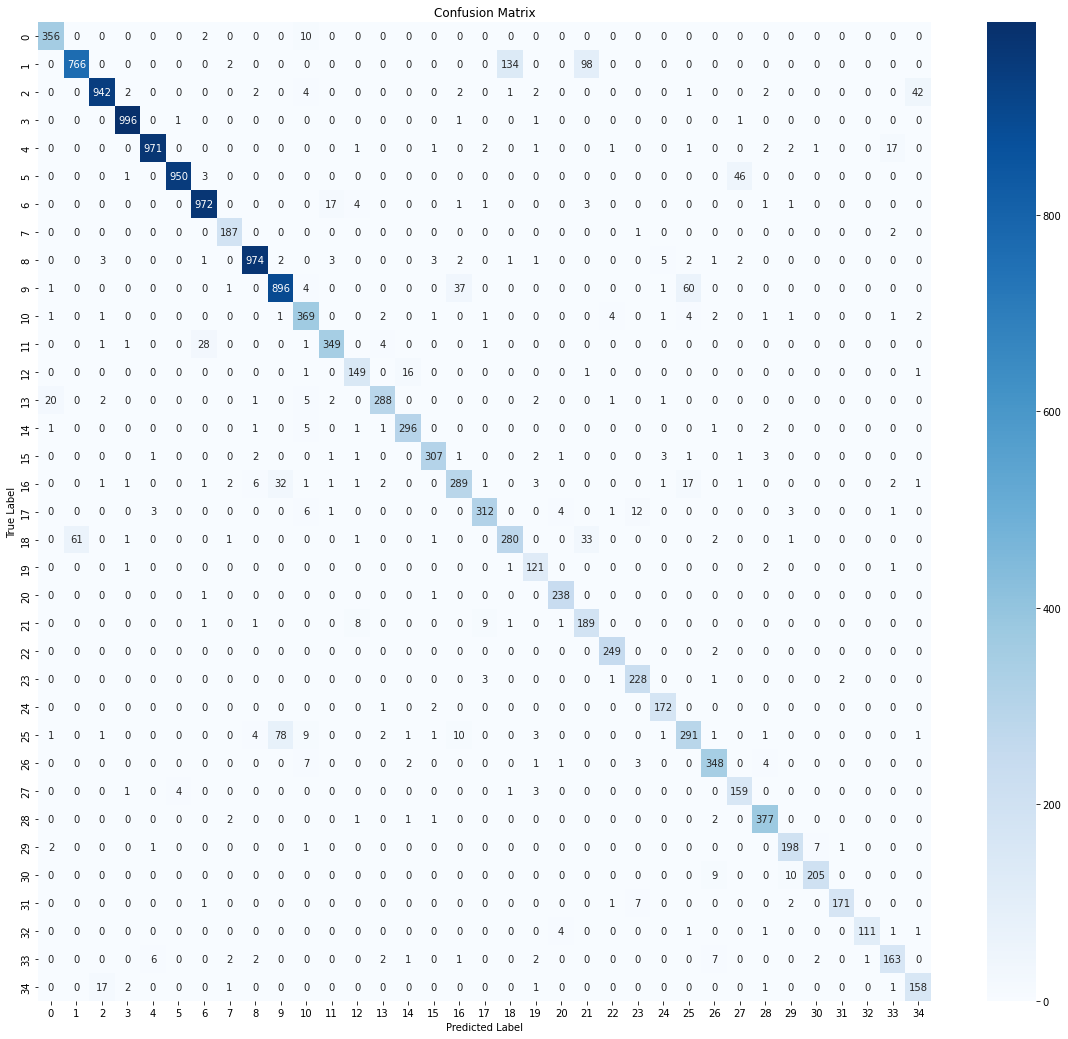


               precision    recall  f1-score   support

           0       0.93      0.97      0.95       368
           1       0.93      0.77      0.84      1000
           2       0.97      0.94      0.96      1000
           3       0.99      1.00      0.99      1000
           4       0.99      0.97      0.98      1000
           5       0.99      0.95      0.97      1000
           6       0.96      0.97      0.97      1000
           7       0.94      0.98      0.96       190
           8       0.98      0.97      0.98      1000
           9       0.89      0.90      0.89      1000
           A       0.87      0.94      0.91       392
           B       0.93      0.91      0.92       385
           C       0.89      0.89      0.89       168
           D       0.95      0.89      0.92       322
           E       0.93      0.96      0.95       308
           F       0.97      0.95      0.96       324
           G       0.84      0.80      0.82       363
           H       0.95  

In [42]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(val_X)
pred=LB.inverse_transform(predictions)
valY=LB.inverse_transform(val_Y)
cm = confusion_matrix(valY, pred)
plt.figure(figsize=(20, 18))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
print("\n",classification_report(valY,pred))

## Recognition and Post-Processing 
1. The sort contours function is used to get the correct order of individual characters for correct output extraction. In this case for extracting a single word, a left to right sorting of individual characters is needed.
2. The get letters function fetches the list of letters and get word function gets the individual word. 

In [27]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [28]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [29]:
def get_word(letter):
    word = "".join(letter)
    return word

BENE5


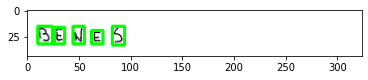

In [30]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

LIL0U


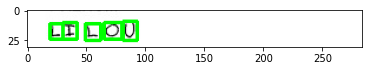

In [31]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

JAFFELX


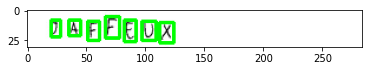

In [32]:
letter,image = get_letters("../input/handwriting-recognition/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

RUPP


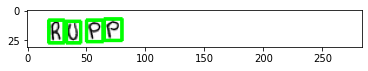

In [33]:
letter,image = get_letters("../input/handwriting-recognition/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

VALENTINE


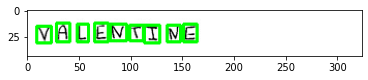

In [34]:
letter,image = get_letters("../input/handwriting-recognition/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)